In [64]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import scipy as sp
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OrdinalEncoder, OneHotEncoder, KBinsDiscretizer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer


# Feature Engineering


The most important library for ML is scikit-learn, a de-facto standard for developing ML-oriented projects. Here we introduced some characteristics of the library which are helpful for the data preprocessing phase in ML project.
Moreover, we also introduce two other important libraries: pandas and numpy. The former plays are important role in data preprocessing, too.

Before doing data preprocessing, we get data from a data source, a CSV file, organized as a table.

## Loading Data
We use module pandas to get the data and transform the CSV file into a table, namely a DataFrame object. A DataFrame is an object modelling tabular data. It's made by rows and each row is described by a set of columns. Each column has a name.

To read csv file, we use method read_csv.

In [4]:
playground = pd.read_csv('data/playground.csv')
playground

,age,length_screw,diameter,middle_diameter,hammer_strength,rank,size,country
0,47.0,39.537837,17.053504,4.301665,46.389102,medium,L,Denmark
1,20.0,-1.034592,-67.283321,NaN,-167.451060,good,XXL,Denmark
2,72.0,40.686959,-21.411874,2.578786,-34.345003,medium,L,Austria
3,23.0,60.179331,39.712469,3.065198,118.023664,perfect,XL,Austria
4,93.0,2.862281,33.059898,NaN,99.476390,perfect,XL,Germany
...,...,...,...,...,...,...,...,...
9995,80.0,29.688847,-8.900835,5.830887,-15.037037,good,XXL,Denmark
9996,35.0,23.757652,54.140757,3.128091,124.841787,medium,L,Germany
9997,31.0,7.493367,-32.458441,2.022378,-83.878678,perfect,L,France
9998,33.0,33.341941,-36.872158,NaN,-84.604433,good,M,Austria


## Preliminary Inspection

We can get information about the table, i.e. types of columns, information about missing values, data distrubution by using methods describe() and info().

In [5]:
playground.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              9990 non-null   float64
 1   length_screw     9970 non-null   float64
 2   diameter         9990 non-null   float64
 3   middle_diameter  4994 non-null   float64
 4   hammer_strength  9970 non-null   float64
 5   rank             9990 non-null   object 
 6   size             9950 non-null   object 
 7   country          9990 non-null   object 
dtypes: float64(5), object(3)
memory usage: 625.1+ KB


The most problematic column is middle_diameter - half the data is missing. Actually, in every column there're at least 10 entries missing.

In [6]:
playground.describe()

,age,length_screw,diameter,middle_diameter,hammer_strength
count,9990.000000,9970.000000,9990.000000,4994.000000,9970.000000
mean,57.820420,29.885444,1.462067,3.006871,14.701874
std,23.368789,20.103509,40.196593,1.996277,101.184493
min,18.000000,-45.443865,-154.473963,-4.079200,-376.367170
25%,37.000000,16.177003,-25.098778,1.684077,-52.087874
50%,58.000000,29.801311,1.209477,2.995461,14.201412
75%,78.000000,43.547181,28.115844,4.344913,81.566187
max,98.000000,99.756118,142.606375,9.735810,344.912921


In [7]:
playground.describe(include='all') # to include categorical data into report

,age,length_screw,diameter,middle_diameter,hammer_strength,rank,size,country
count,9990.000000,9970.000000,9990.000000,4994.000000,9970.000000,9990,9950,9990
unique,NaN,NaN,NaN,NaN,NaN,4,5,7
top,NaN,NaN,NaN,NaN,NaN,perfect,L,Canada
freq,NaN,NaN,NaN,NaN,NaN,2553,2034,1459
mean,57.820420,29.885444,1.462067,3.006871,14.701874,NaN,NaN,NaN
std,23.368789,20.103509,40.196593,1.996277,101.184493,NaN,NaN,NaN
min,18.000000,-45.443865,-154.473963,-4.079200,-376.367170,NaN,NaN,NaN
25%,37.000000,16.177003,-25.098778,1.684077,-52.087874,NaN,NaN,NaN
50%,58.000000,29.801311,1.209477,2.995461,14.201412,NaN,NaN,NaN
75%,78.000000,43.547181,28.115844,4.344913,81.566187,NaN,NaN,NaN


- Percentile 25, for example, means that 25% of the data is less or equal 37 (for age, for example).
- A trick to check if the distribution is ok: check the median (50%) and mean, check if they are ore or less the same. Normal or skew distribution.
- We use describe to get idea about the data we have.

While for numerical columns we get a quite complete overview of the features, for categorical columns we get less information. To obtain a distribution of the unique values in a specific column, we use the value_counts() method. It returns the frequency of each category in a column.

In [8]:
playground['size'].value_counts()

size
L      2034
XXL    2011
M      1989
S      1976
XL     1940
Name: count, dtype: int64

In [9]:
playground.country.value_counts()

country
Canada     1459
Germany    1443
Spain      1438
Austria    1425
France     1423
Denmark    1405
Italy      1397
Name: count, dtype: int64

In [10]:
playground[['size', 'country']].value_counts()

size  country
S     Italy      315
L     Germany    311
XXL   Canada     305
L     Canada     305
      Austria    302
      France     302
M     Germany    299
XL    Canada     297
XXL   Spain      294
      Denmark    293
S     Austria    292
M     Spain      291
XXL   Italy      287
M     Denmark    286
XL    Spain      286
S     France     286
XL    Germany    285
      Austria    285
XXL   Germany    285
M     Italy      284
L     Spain      283
S     Spain      283
L     Denmark    280
M     Canada     279
XXL   France     278
M     France     277
S     Denmark    274
M     Austria    273
XL    France     271
S     Canada     269
XXL   Austria    269
XL    Denmark    263
S     Germany    257
XL    Italy      253
L     Italy      251
Name: count, dtype: int64

## Feature Engineering - Data Preprocessing
### Dealing with missing data
In Pandas there are methods which help to locate missing values. One of them is isnull().

In [12]:
playground.isnull().head(10) # binary table, True for missing values

,age,length_screw,diameter,middle_diameter,hammer_strength,rank,size,country
0,False,False,False,False,False,False,False,False
1,False,False,False,True,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False
5,False,False,False,False,False,False,False,False
6,False,False,False,True,False,False,False,False
7,False,False,False,True,False,False,False,False
8,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False


In [13]:
playground.isnull().tail(10) # same but for the LAST 10 entries instead

,age,length_screw,diameter,middle_diameter,hammer_strength,rank,size,country
9990,False,False,False,False,False,False,False,False
9991,False,False,False,True,False,False,False,False
9992,False,False,False,True,False,False,False,False
9993,False,False,False,False,False,False,False,False
9994,False,False,False,False,False,False,False,False
9995,False,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False,False
9998,False,False,False,True,False,False,False,False
9999,False,False,False,False,False,False,False,False


We can count the number of missing values per column by the method sum() for a boolean DataFrame.

In [14]:
playground.isnull().sum(axis=0) # axis = 1 for rows, axis = 0 for columns

age                  10
length_screw         30
diameter             10
middle_diameter    5006
hammer_strength      30
rank                 10
size                 50
country              10
dtype: int64

- Task: get the number of rows containing at least one missing value.
- If we evaluate a comparison operator like df > value, we get a boolean DataFrame. The same holds for Series - pandas.Series, aka a single row or column.

In [15]:
(playground.isnull().sum(axis=1) > 0).sum()

5039

In [16]:
playground.isnull().sum(axis=1) > 0

0       False
1        True
2       False
3       False
4        True
        ...  
9995    False
9996    False
9997    False
9998     True
9999    False
Length: 10000, dtype: bool

- True means that row contains at least one missing value.

In [19]:
(playground.isnull().sum(axis=1) > 3).sum()

10

How to deal with missing value after we identified it?
Option 1: to drop missing value. We drop either row, or column from the data. It's done by the method dropna().
Option 2: apply method to fill in the gap. Data imputation.

In [22]:
playground.dropna(axis=0) # drop all rows with at least one missing value

,age,length_screw,diameter,middle_diameter,hammer_strength,rank,size,country
0,47.0,39.537837,17.053504,4.301665,46.389102,medium,L,Denmark
2,72.0,40.686959,-21.411874,2.578786,-34.345003,medium,L,Austria
3,23.0,60.179331,39.712469,3.065198,118.023664,perfect,XL,Austria
5,65.0,52.287209,12.532527,4.092027,44.922023,bad,M,Austria
8,65.0,51.078399,-22.971850,4.033592,-33.540389,good,S,Denmark
...,...,...,...,...,...,...,...,...
9994,76.0,37.231863,-23.314827,2.293006,-38.269593,perfect,S,Italy
9995,80.0,29.688847,-8.900835,5.830887,-15.037037,good,XXL,Denmark
9996,35.0,23.757652,54.140757,3.128091,124.841787,medium,L,Germany
9997,31.0,7.493367,-32.458441,2.022378,-83.878678,perfect,L,France


- It's not a good solution because we removed more than half of the data.
- We didn't actually remove data from the DataFrame, we just returned a new one. The original set remains untouched, unless we applied inplace=True parameter.
- We can't remove all features with missing data, because this way we delete all the data.

In [23]:
playground.dropna(axis=1)

""
0
1
2
3
4
...
9995
9996
9997
9998


The problem is middle_diameter, because it contains most of missing data (over a half). We remove it by exploiting parameter thresh in the method dropna.

In [24]:
playground.dropna(thresh=4996, axis=1)

,age,length_screw,diameter,hammer_strength,rank,size,country
0,47.0,39.537837,17.053504,46.389102,medium,L,Denmark
1,20.0,-1.034592,-67.283321,-167.451060,good,XXL,Denmark
2,72.0,40.686959,-21.411874,-34.345003,medium,L,Austria
3,23.0,60.179331,39.712469,118.023664,perfect,XL,Austria
4,93.0,2.862281,33.059898,99.476390,perfect,XL,Germany
...,...,...,...,...,...,...,...
9995,80.0,29.688847,-8.900835,-15.037037,good,XXL,Denmark
9996,35.0,23.757652,54.140757,124.841787,medium,L,Germany
9997,31.0,7.493367,-32.458441,-83.878678,perfect,L,France
9998,33.0,33.341941,-36.872158,-84.604433,good,M,Austria


In [26]:
playground = playground.dropna(thresh=4996, axis=1).dropna(axis=0, how='all') # dropping first all columns, then all rows

In [29]:
playground.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9990 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              9990 non-null   float64
 1   length_screw     9970 non-null   float64
 2   diameter         9990 non-null   float64
 3   hammer_strength  9970 non-null   float64
 4   rank             9990 non-null   object 
 5   size             9950 non-null   object 
 6   country          9990 non-null   object 
dtypes: float64(4), object(3)
memory usage: 624.4+ KB


- We get not completely clean dataset, we still have some missing data to deal with.
- We can use Mode Imputation to replace missing data. We use sklearn library for this. Specifically, we use impute.SimpleImputer.
- fit_transform() method creates a new version of data. Creates a new column.

In [37]:
si = SimpleImputer(strategy='most_frequent') # strategy is for the strategy to impute data, i.e. mode, mean, median
playground[['size']] = si.fit_transform(playground[['size']]) # double square brackets to avoid warning

The outcome of fit_transform is a column we need. We have to substitute the column in the original data with the one we got.

In [38]:
playground.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9990 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              9990 non-null   float64
 1   length_screw     9970 non-null   float64
 2   diameter         9990 non-null   float64
 3   hammer_strength  9970 non-null   float64
 4   rank             9990 non-null   object 
 5   size             9990 non-null   object 
 6   country          9990 non-null   object 
dtypes: float64(4), object(3)
memory usage: 624.4+ KB


Now we do this for other features. This time we use strategy mean.

In [39]:
si_mean = SimpleImputer(strategy='mean')
playground[['length_screw', 'hammer_strength']] = si_mean.fit_transform(playground[['length_screw', 'hammer_strength']])
playground.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9990 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              9990 non-null   float64
 1   length_screw     9990 non-null   float64
 2   diameter         9990 non-null   float64
 3   hammer_strength  9990 non-null   float64
 4   rank             9990 non-null   object 
 5   size             9990 non-null   object 
 6   country          9990 non-null   object 
dtypes: float64(4), object(3)
memory usage: 624.4+ KB


### Transform Categorical Data
#### The Pandas way
Features size and rank in our dataset are ordinal (they can be sorted or ordered). We have to apply the most suitable transformation to them.

In [43]:
playground['size'].value_counts().sort_values()

size
XL     1940
S      1976
M      1989
XXL    2011
L      2074
Name: count, dtype: int64

In [46]:
playground['size'] = playground['size'].map({'S':0, 'M':1, 'L':2, 'XL':3, 'XXL':4})

In [47]:
playground.head(10)

,age,length_screw,diameter,hammer_strength,rank,size,country
0,47.0,39.537837,17.053504,46.389102,medium,2,Denmark
1,20.0,-1.034592,-67.283321,-167.451060,good,4,Denmark
2,72.0,40.686959,-21.411874,-34.345003,medium,2,Austria
3,23.0,60.179331,39.712469,118.023664,perfect,3,Austria
4,93.0,2.862281,33.059898,99.476390,perfect,3,Germany
5,65.0,52.287209,12.532527,44.922023,bad,1,Austria
6,61.0,15.333484,56.060051,139.342117,perfect,0,Italy
7,45.0,34.528579,18.256918,60.614833,good,2,Austria
8,65.0,51.078399,-22.971850,-33.540389,good,0,Denmark
9,98.0,26.075552,-42.128512,-96.732981,perfect,1,France


In [48]:
playground['rank'].value_counts().sort_values()

rank
bad        2461
good       2486
medium     2490
perfect    2553
Name: count, dtype: int64

In [49]:
playground['rank'] = playground['rank'].map({'bad':0, 'medium':1, 'good':2, 'perfect':3})
playground.head(10)

,age,length_screw,diameter,hammer_strength,rank,size,country
0,47.0,39.537837,17.053504,46.389102,1,2,Denmark
1,20.0,-1.034592,-67.283321,-167.451060,2,4,Denmark
2,72.0,40.686959,-21.411874,-34.345003,1,2,Austria
3,23.0,60.179331,39.712469,118.023664,3,3,Austria
4,93.0,2.862281,33.059898,99.476390,3,3,Germany
5,65.0,52.287209,12.532527,44.922023,0,1,Austria
6,61.0,15.333484,56.060051,139.342117,3,0,Italy
7,45.0,34.528579,18.256918,60.614833,2,2,Austria
8,65.0,51.078399,-22.971850,-33.540389,2,0,Denmark
9,98.0,26.075552,-42.128512,-96.732981,3,1,France


The feature country is nominal, we can't actually sort it. We need to use sklearn library for this.

#### The Sklearn way
In sklearn library, we use OrdinalEncoder for ordinal features and OneHotEncoder for nominal features.

One of the parameters in the OrdinalEncoder constructor is categories. It is used to specify the order of the categories in the i-th feature. Specifically we can pass a list of lists/array.

In [50]:
oe_size = OrdinalEncoder(categories=[['S', 'M', 'L', 'XL', 'XXL']])
oe_size.fit_transform(playground[['size']])

ValueError: invalid literal for int() with base 10: 'S'

In [51]:
oe_rank = OrdinalEncoder(categories=[['bad', 'medium', 'good', 'perfect']])
oe_rank.fit_transform(playground[['rank']])

ValueError: invalid literal for int() with base 10: 'bad'

In [52]:
ohe_country = OneHotEncoder()
temp = ohe_country.fit_transform(playground[['country']]).toarray()
names = ohe_country.get_feature_names_out()
playground[list(names)] = temp

In [53]:
playground.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9990 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              9990 non-null   float64
 1   length_screw     9990 non-null   float64
 2   diameter         9990 non-null   float64
 3   hammer_strength  9990 non-null   float64
 4   rank             9990 non-null   int64  
 5   size             9990 non-null   int64  
 6   country          9990 non-null   object 
 7   country_Austria  9990 non-null   float64
 8   country_Canada   9990 non-null   float64
 9   country_Denmark  9990 non-null   float64
 10  country_France   9990 non-null   float64
 11  country_Germany  9990 non-null   float64
 12  country_Italy    9990 non-null   float64
 13  country_Spain    9990 non-null   float64
dtypes: float64(11), int64(2), object(1)
memory usage: 1.1+ MB


### Binning Data
The process of converting a continuous feature into discrete values. Helps to reduce effect of outliers and learning using few samples.

The feature age is numerical and continuous nominal. We apply different strategy for binning.

In [54]:
binner1 = KBinsDiscretizer(n_bins=10, strategy='uniform', encode='ordinal')
binner2 = KBinsDiscretizer(n_bins=10, strategy='quantile', encode='ordinal')
binner3 = KBinsDiscretizer(n_bins=10, strategy='kmeans', encode='ordinal')

/Users/alex_k/Desktop/Machine-Learning-Course/venv/lib/python3.8/site-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


array([[<Axes: title={'center': '0'}>]], dtype=object)

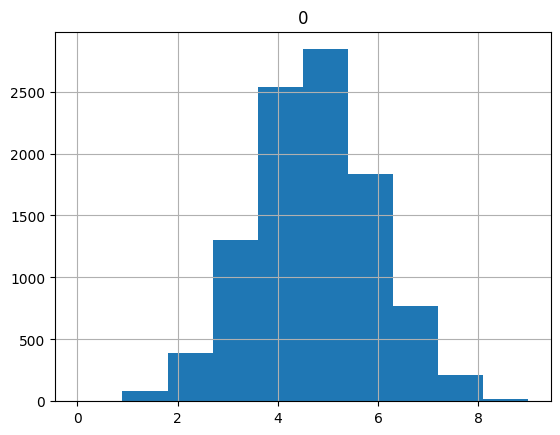

In [55]:
pd.DataFrame(binner1.fit_transform(playground[['diameter']])).hist()

array([[<Axes: title={'center': '0'}>]], dtype=object)

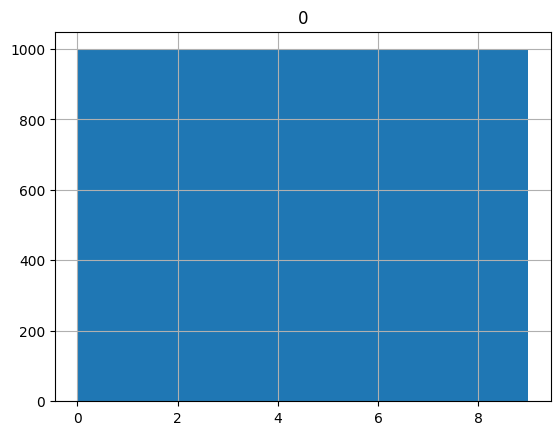

In [56]:
pd.DataFrame(binner2.fit_transform(playground[['diameter']])).hist()

/Users/alex_k/Desktop/Machine-Learning-Course/venv/lib/python3.8/site-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/Users/alex_k/Desktop/Machine-Learning-Course/venv/lib/python3.8/site-packages/threadpoolctl.py:1019: RuntimeWarning: libc not found. The ctypes module in Python 3.8 is maybe too old for this OS.
  warnings.warn(


array([[<Axes: title={'center': '0'}>]], dtype=object)

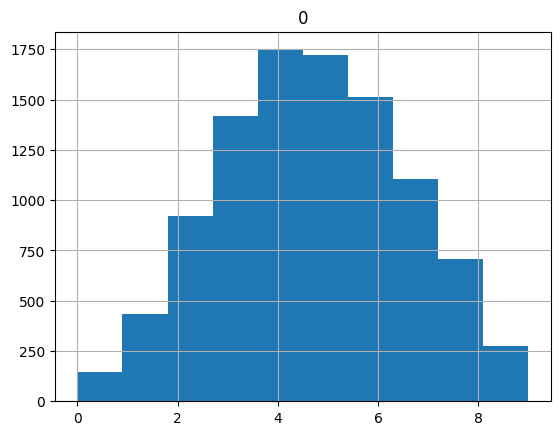

In [57]:
pd.DataFrame(binner3.fit_transform(playground[['diameter']])).hist()

### Feature scaling
We apply a min-max scaling to the feature age.

In [58]:
mm_scaler = MinMaxScaler()
mm_scaler.fit_transform(playground[['age']])

array([[0.3625],
       [0.025 ],
       [0.675 ],
       ...,
       [0.1625],
       [0.1875],
       [0.725 ]])

We apply a standardization to the features length_screw, diameter, hammer_strength.

In [59]:
sscaler = StandardScaler()
sscaler.fit_transform(playground[['length_screw', 'diameter', 'hammer_strength']])

array([[ 0.48064018,  0.38789898,  0.31349256],
       [-1.53966089, -1.71031482, -1.80210112],
       [ 0.5378606 , -0.56908024, -0.48523749],
       ...,
       [-1.11501183, -0.8439075 , -0.97529103],
       [ 0.17211597, -0.95371625, -0.98247117],
       [-0.07080558,  0.51831827,  0.40172249]])

In [60]:
playground.head()

,age,length_screw,diameter,hammer_strength,rank,size,country,country_Austria,country_Canada,country_Denmark,country_France,country_Germany,country_Italy,country_Spain
0,47.0,39.537837,17.053504,46.389102,1,2,Denmark,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,20.0,-1.034592,-67.283321,-167.451060,2,4,Denmark,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,72.0,40.686959,-21.411874,-34.345003,1,2,Austria,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,23.0,60.179331,39.712469,118.023664,3,3,Austria,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,93.0,2.862281,33.059898,99.476390,3,3,Germany,0.0,0.0,0.0,0.0,1.0,0.0,0.0


### Pipeline
In this case, we have to implement two pipelines composed of two transformers.
We define the first pipeline composed by SimpleIMputer with strategy 'mean' and StandardScaler

In [61]:
imp_scaler = Pipeline(
    [
        ('pipe1_si', SimpleImputer(strategy='mean')),
        ('pipe1_scaler', StandardScaler())
    ]
)
imp_scaler.fit_transform(playground[['length_screw', 'hammer_strength']])

array([[ 0.48064018,  0.31349256],
       [-1.53966089, -1.80210112],
       [ 0.5378606 , -0.48523749],
       ...,
       [-1.11501183, -0.97529103],
       [ 0.17211597, -0.98247117],
       [-0.07080558,  0.40172249]])

Now we define the second and third pipelines composed in this way:
- Pipeline 2: SimpleImputer sith strategy 'most_frequent', OrdinalEncoder for size with categories S, M, L, XL, XXL
- Pipeline 3: OrdinalEncoder with categories bad, medium, good, perfect and MinMaxScaler

In [62]:
imp_ordinal = Pipeline(
    [
        ('pipe2_si', SimpleImputer(strategy='most_frequent')),
        ('pipe2_ordinal', OrdinalEncoder(categories=[['S', 'M', 'L', 'XL', 'XXL']])),
        ('pipe2_mm', MinMaxScaler())
    ]
)

imp_ordinal2 = Pipeline(
    [
        ('pipe3_ordinal', OrdinalEncoder(categories=[['bad', 'medium', 'good', 'perfect']])),
        ('pipe3_mm', MinMaxScaler())
    ]
)

Once we defined the pipelines, we have all the transformers-ingredients-to build a ColumnTransformer to apply to our dataset.

### ColumnTransformer
We implement the ColumnTransformer.

In [73]:
playground = pd.read_csv('data/playground.csv').dropna(thresh=6000, axis=1).dropna(axis=0, how='all')
playground

,age,length_screw,diameter,hammer_strength,rank,size,country
0,47.0,39.537837,17.053504,46.389102,medium,L,Denmark
1,20.0,-1.034592,-67.283321,-167.451060,good,XXL,Denmark
2,72.0,40.686959,-21.411874,-34.345003,medium,L,Austria
3,23.0,60.179331,39.712469,118.023664,perfect,XL,Austria
4,93.0,2.862281,33.059898,99.476390,perfect,XL,Germany
...,...,...,...,...,...,...,...
9995,80.0,29.688847,-8.900835,-15.037037,good,XXL,Denmark
9996,35.0,23.757652,54.140757,124.841787,medium,L,Germany
9997,31.0,7.493367,-32.458441,-83.878678,perfect,L,France
9998,33.0,33.341941,-36.872158,-84.604433,good,M,Austria


In [74]:
playground_tf = ColumnTransformer(
    transformers=[
        ('age', MinMaxScaler(), ['age']),
        ('imp_std', imp_scaler, ['length_screw','hammer_strength']),
        ('diam_std', StandardScaler(), ['diameter']),
        ('rank', imp_ordinal2, ['rank']),
        ('imp_ord', imp_ordinal, ['size']),
        ('country_hot', OneHotEncoder(drop='first',categories='auto'),['country'])
    ],
    verbose_feature_names_out = False
)

In [75]:
playground_tf.fit(playground)
new_playground = pd.DataFrame(playground_tf.transform(playground), columns=playground_tf.get_feature_names_out())
new_playground

,age,length_screw,hammer_strength,diameter,rank,size,country_Canada,country_Denmark,country_France,country_Germany,country_Italy,country_Spain
0,0.3625,0.480640,0.313493,0.387899,0.333333,0.50,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0250,-1.539661,-1.802101,-1.710315,0.666667,1.00,0.0,1.0,0.0,0.0,0.0,0.0
2,0.6750,0.537861,-0.485237,-0.569080,0.333333,0.50,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0625,1.508482,1.022198,0.951631,1.000000,0.75,0.0,0.0,0.0,0.0,0.0,0.0
4,0.9375,-1.345616,0.838703,0.786122,1.000000,0.75,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
9985,0.7750,-0.009790,-0.294217,-0.257818,0.666667,1.00,0.0,1.0,0.0,0.0,0.0,0.0
9986,0.2125,-0.305133,1.089652,1.310592,0.333333,0.50,0.0,0.0,0.0,1.0,0.0,0.0
9987,0.1625,-1.115012,-0.975291,-0.843907,1.000000,0.50,0.0,0.0,1.0,0.0,0.0,0.0
9988,0.1875,0.172116,-0.982471,-0.953716,0.666667,0.25,0.0,0.0,0.0,0.0,0.0,0.0


In [76]:
new_playground.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9990 entries, 0 to 9989
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              9990 non-null   float64
 1   length_screw     9990 non-null   float64
 2   hammer_strength  9990 non-null   float64
 3   diameter         9990 non-null   float64
 4   rank             9990 non-null   float64
 5   size             9990 non-null   float64
 6   country_Canada   9990 non-null   float64
 7   country_Denmark  9990 non-null   float64
 8   country_France   9990 non-null   float64
 9   country_Germany  9990 non-null   float64
 10  country_Italy    9990 non-null   float64
 11  country_Spain    9990 non-null   float64
dtypes: float64(12)
memory usage: 936.7 KB


In [77]:
new_playground.shape

(9990, 12)